# Imports

In [1]:
import os

os.chdir('..')

# Generation

## Mutation

In [2]:
from population import Population
from organism import Organism
from history import InnovationHistory

State
Neurons: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
Connections: 0, []



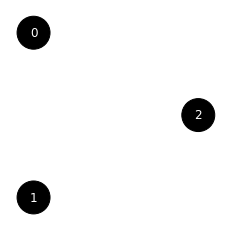

In [3]:
population = Population(1000, 1, 1)
population.innovation_history = InnovationHistory(population.num_inputs + population.num_outputs + 2) 
player1 = Organism(1, 1)
player1.print_state()
player1.draw_state()

State
Neurons: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
Connections: 1, [C(Node(1,L=0)->Node(2,L=1),W=-0.6914,I=1,E=1)]

[(1, 2)]


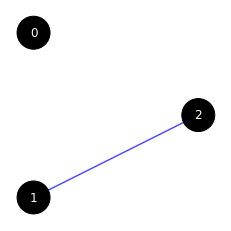

In [4]:
population.mutate_genome(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(2,L=2)]}
Connections: 4, [C(Node(1,L=0)->Node(2,L=2),W=-0.6914,I=1,E=0), C(Node(1,L=0)->Node(4,L=1),W=1.0000,I=2,E=1), C(Node(4,L=1)->Node(2,L=2),W=-0.6914,I=3,E=1), C(Node(0,L=0)->Node(4,L=1),W=0.0000,I=4,E=1)]

[(1, 2), (1, 4), (4, 2), (0, 4)]


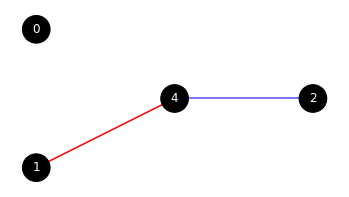

In [5]:
population.mutate_neuron(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(2,L=2)]}
Connections: 5, [C(Node(1,L=0)->Node(2,L=2),W=-0.6914,I=1,E=0), C(Node(1,L=0)->Node(4,L=1),W=1.0000,I=2,E=1), C(Node(4,L=1)->Node(2,L=2),W=-0.6914,I=3,E=1), C(Node(0,L=0)->Node(4,L=1),W=0.0000,I=4,E=1), C(Node(0,L=0)->Node(2,L=2),W=0.6387,I=5,E=1)]

[(1, 2), (1, 4), (4, 2), (0, 4), (0, 2)]


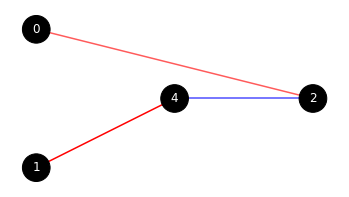

In [6]:
population.mutate_gene(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(5,L=2)], 3: [Node(2,L=3)]}
Connections: 8, [C(Node(1,L=0)->Node(2,L=3),W=-0.6914,I=1,E=0), C(Node(1,L=0)->Node(4,L=1),W=1.0000,I=2,E=1), C(Node(4,L=1)->Node(2,L=3),W=-0.6914,I=3,E=0), C(Node(0,L=0)->Node(4,L=1),W=0.0000,I=4,E=1), C(Node(0,L=0)->Node(2,L=3),W=0.6387,I=5,E=1), C(Node(4,L=1)->Node(5,L=2),W=1.0000,I=6,E=1), C(Node(5,L=2)->Node(2,L=3),W=-0.6914,I=7,E=1), C(Node(0,L=0)->Node(5,L=2),W=0.0000,I=8,E=1)]

[(1, 2), (1, 4), (4, 2), (0, 4), (0, 2), (4, 5), (5, 2), (0, 5)]


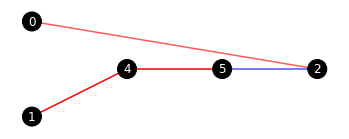

In [7]:
population.mutate_neuron(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(5,L=2)], 3: [Node(2,L=3)]}
Connections: 8, [C(Node(1,L=0)->Node(2,L=3),W=-0.6873,I=1,E=0), C(Node(1,L=0)->Node(4,L=1),W=1.0000,I=2,E=1), C(Node(4,L=1)->Node(2,L=3),W=-0.7011,I=3,E=0), C(Node(0,L=0)->Node(4,L=1),W=0.0263,I=4,E=1), C(Node(0,L=0)->Node(2,L=3),W=0.6074,I=5,E=1), C(Node(4,L=1)->Node(5,L=2),W=-0.9103,I=6,E=1), C(Node(5,L=2)->Node(2,L=3),W=0.1341,I=7,E=1), C(Node(0,L=0)->Node(5,L=2),W=0.6061,I=8,E=1)]

[(1, 2), (1, 4), (4, 2), (0, 4), (0, 2), (4, 5), (5, 2), (0, 5)]


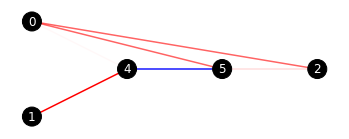

In [8]:
population.mutate_genome(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(5,L=2)], 3: [Node(2,L=3)]}
Connections: 8, [C(Node(1,L=0)->Node(2,L=3),W=-0.6873,I=1,E=0), C(Node(1,L=0)->Node(4,L=1),W=1.0000,I=2,E=1), C(Node(4,L=1)->Node(2,L=3),W=-0.7011,I=3,E=0), C(Node(0,L=0)->Node(4,L=1),W=0.0263,I=4,E=1), C(Node(0,L=0)->Node(2,L=3),W=0.6074,I=5,E=1), C(Node(4,L=1)->Node(5,L=2),W=-0.9103,I=6,E=1), C(Node(5,L=2)->Node(2,L=3),W=0.1341,I=7,E=1), C(Node(0,L=0)->Node(5,L=2),W=0.6061,I=8,E=1)]

[(0, 4), (1, 4), (2, 3), (0, 3), (2, 4), (1, 3), (2, 6), (6, 3), (0, 6)]


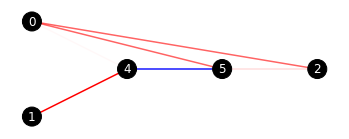

In [11]:
player2 = population.clone(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

In [ ]:
population.mutate_genome(player2)
player2.print_state()
player2.draw_state()
print(population.innovation_history.innovations)

# Training

In [9]:
def population_info(population):
    return "Players: %d\n" % len(population.players) + \
    "Species: %d\n" % len(population.species) + \
    "Innovations: %d\n" % len(population.innovation_history.innovations) + \
    "Species Threshold: %.4f" % population.species_threshold

def species_info(i):
    fitness = 0
    for player in population.species[i].players:
        fitness += player.fitness
    average_fitness = fitness / len(population.species[i].players)
    return "Species %d - " % i + \
    "Players: %d, " % len(population.species[i].players) + \
    "Average Fitness: %.4f, " % average_fitness + \
    "Max Fitness: %.4f, " % population.species[i].fittest_player.fitness + \
    "Max Fitness Ever: %.4f, " % population.species[i].max_fitness + \
    "Fittest Innovations: %d, " % len(population.species[i].fittest_player.innovation_labels) + \
    "Staleness: %d" % population.species[i].staleness

In [10]:
from Circuit_Design.circuit_games import XORGame

population = Population(1000, 2, 2)

for _ in range(10):
    population.new_generation()
    won = XORGame(100).play_game(population.players)
    for i in range(len(population.players)):
        population.players[i].set_fitness(won[i])
    population.update_generation()
    print(population_info(population))
    for i in range(len(population.species)):
        print(species_info(i))

Players: 1000
Species: 1
Innovations: 6
Species Threshold: 2.7000
Species 0 - Players: 501, Average Fitness: 53.8842, Max Fitness: 65.0000, Max Fitness Ever: 65.0000, Fittest Innovations: 1, Staleness: 0


AttributeError: 'NoneType' object has no attribute 'layer'